# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.002
-0.003
0.0
-0.002
-0.002
-0.001
0.974
0.973
0.974
0.974
0.976
1.98
1.98
1.98
1.98
2.954
2.956
2.957
2.956
2.957
3.93
3.932
3.933
3.933
3.933
4.912
4.911
4.91
4.911
5.883
5.885
5.887
5.887
5.887
6.818
6.818
6.818
6.818
7.751
7.751
7.749
7.749
7.75
8.724
8.726
8.728
8.728
8.726
9.701
9.704
9.705
9.705
9.705
10.681
10.685
10.685
10.684
10.685
11.659
11.661
11.666
11.666
11.664
12.641
12.642
12.641
12.641
13.619
13.62
13.62
14.172
14.175
14.176
14.176
14.176
14.731
14.731
14.729
14.732
15.707
15.713
15.711
15.709
15.709
15.709
16.688
16.688
17.668
17.668
17.667
17.667
18.643
18.645
18.648
18.647
18.647
19.623
19.625
19.626
19.625
19.625
20.6
20.603
20.604
20.603
20.603
21.366
21.366
21.366
21.366
22.127
22.127
22.126
22.126
23.108
23.108
23.107
23.107
24.089
24.089
24.088
24.088
25.07
25.069
25.068
25.068
26.049
26.049
26.048
26.047
27.026


56.603
56.603
56.603
56.603
56.603
56.602
56.602
56.754
56.754
56.754
56.754
56.754
56.754
56.775
56.773
56.772
56.772
56.772
56.772
56.772
56.778
56.779
56.778
56.778
56.777
56.777
56.776
56.779
56.775
56.775
56.775
56.775
56.773
56.774
56.775
56.775
56.775
56.775
56.775
56.774
56.774
56.774
56.774
56.774
56.773
56.773
56.773
56.773
56.773
56.773
56.773
56.773
56.773
56.774
56.773
56.773
56.773
56.772
56.772
56.825
56.875
56.875
56.921
56.966
56.966
56.966
56.966
56.966
56.966
56.966
56.966
56.966
56.997
56.997
56.997
56.997
56.997
56.997
56.997
57.001
57.003
57.003
57.003
57.003
57.002
57.002
56.999
56.999
56.999
57.0
57.0
57.002
57.001
57.001
57.001
57.3
57.3
57.331
57.331
57.331
57.331
57.334
57.333
57.333
57.332
57.334
57.756
57.756
57.791
57.791
57.791
57.792
57.792
57.792
57.79
57.791
57.939
57.981
57.981
57.981
57.98
57.982
57.982
57.981
57.981
57.981
58.217
58.217
58.243
58.261
58.261
58.262
58.262
58.262
58.26
58.26
58.261
58.659
58.69
58.69
58.69
58.692
58.691
58.69
58.689
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1411,2822,58.948
1412,2824,58.950
1413,2826,58.951
1414,2828,58.951


<IPython.core.display.Javascript object>


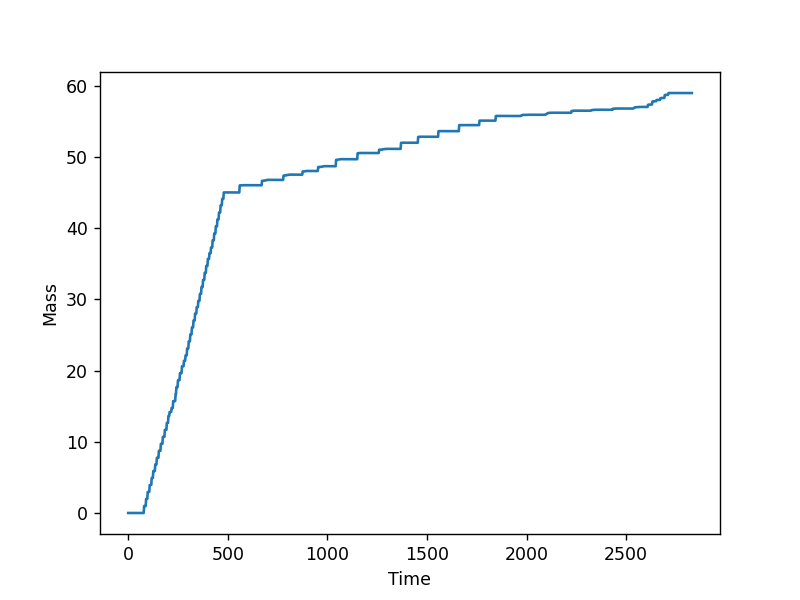

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_010923_S793-798.csv')